# Proyek Analisis Data: E-Commerce
- Nama: Valerian Dwi Purnomo
- Email: valerian.dwi.p@gmail.com
- Id Dicoding: valeriandwi

## Menentukan Pertanyaan Bisnis

- Kategori produk apa saja yang banyak dibeli ?
- Pembeli darimana saja yang banyak melakukan order ?
- Bagaimana tingkat kepuasan customer terhadap layanan?

## Menyiapkan semua library yang dibuthkan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import matplotlib.image as mpimg
import seaborn as sns
from scipy import stats

## Data Wrangling

### Gathering Data

In [ ]:
data_dir = "/content/data/"

customers = pd.read_csv(data_dir + 'customers_dataset.csv')
orders = pd.read_csv(data_dir + 'orders_dataset.csv')
geolocation = pd.read_csv(data_dir + 'geolocation_dataset.csv')
order_items = pd.read_csv(data_dir + 'order_items_dataset.csv')
order_payments = pd.read_csv(data_dir + 'order_payments_dataset.csv')
order_reviews = pd.read_csv(data_dir + 'order_reviews_dataset.csv')
product_category = pd.read_csv(data_dir + 'product_category_name_translation.csv')
products = pd.read_csv(data_dir + 'products_dataset.csv')
sellers = pd.read_csv(data_dir + 'sellers_dataset.csv')

data = {
    'orders' : orders,
    'customers' : customers,
    'geolocation' : geolocation,
    'order_items' : order_items,
    'order_payments' : order_payments,
    'order_reviews' : order_reviews,
    'product_category' : product_category,
    'products' : products,
    'sellers' : sellers
}

In [ ]:
data['customers'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
data['orders'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
data['geolocation'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
data['order_items'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
data['order_payments'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
data['order_reviews'].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
data['product_category'].head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
data['products'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
data['sellers'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

Check all data types

In [ ]:
for df_name, df in data.items() :
  print('\n', data[df_name].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 no

In [ ]:
order_datetime = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']
for column in order_datetime :
  data['orders'][column] = pd.to_datetime(data['orders'][column])

review_datetime = ['review_creation_date','review_answer_timestamp']
for column in review_datetime :
  data['order_reviews'][column] = pd.to_datetime(data['order_reviews'][column])

order_items_datetime = ['shipping_limit_date']
for column in order_items_datetime :
  data['order_items'][column] = pd.to_datetime(data['order_items'][column])

Check duplicate datas

In [ ]:
#initialize store
duplicate_counts = {}
total_sample_counts = {}

#Calculate duplicate data
for df_name, df in data.items() :
  duplicate_counts[df_name] = df.duplicated().sum()
  total_sample_counts[df_name] = len(df)

#Create DataFrames
duplicate_counts_df = pd.DataFrame.from_dict(duplicate_counts,orient='index', columns=['Duplicate Counts'])
total_sample_counts_df = pd.DataFrame.from_dict(total_sample_counts, orient='index', columns=['Total Sample Countr'])

#Combine Duplicate and Total Sample DataFrame
pd.concat([total_sample_counts_df,duplicate_counts_df], axis=1)

,Total Sample Countr,Duplicate Counts
orders,99441,0
customers,99441,0
geolocation,1000163,261831
order_items,112650,0
order_payments,103886,0
order_reviews,99224,0
product_category,71,0
products,32951,0
sellers,3095,0


Check for missing values

In [ ]:
null_counts = {}

for df_name, df in data.items() :
  null_counts[df_name] = df.isna().sum()
  print(df_name, '\n', null_counts[df_name], '\n')

orders 
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64 

customers 
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64 

geolocation 
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64 

order_items 
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 

order_payments 
 order_id                0
payment_sequential      0
payment_type            0
pa

### Cleaning Data

Order

In [ ]:
print(data['orders']['order_status'].value_counts())
print('Data order yang sudah berstatus delivery ' + str(round((data['orders'].order_status.value_counts()['delivered']/len(data['orders']))*100,2)) +
      '%.')

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64
Data order yang sudah berstatus delivery 97.02%.


In [ ]:
ids_order_not_delivered = data['orders']['order_id'][data['orders']['order_status'] != 'delivered'].values

#filter dataframes lain yang order_idnya
for key, value in data.items() :
  if 'order_id' in value.columns :
    value.drop(value.loc[value['order_id'].isin(ids_order_not_delivered)].index, inplace = True)

In [ ]:
#check values is null
for key, value in data.items() :
  for col in value.columns :
    if value[col].isnull().sum():
      print(col + ' (%): ' + str((sum(value[col].isnull()) / len(value) * 100)))

order_approved_at (%): 0.014511080246273761
order_delivered_carrier_date (%): 0.0020730114637533947
order_delivered_customer_date (%): 0.008292045855013579
review_comment_title (%): 88.36873839001255
review_comment_message (%): 59.4244559520968
product_category_name (%): 1.8512336499650999
product_name_lenght (%): 1.8512336499650999
product_description_lenght (%): 1.8512336499650999
product_photos_qty (%): 1.8512336499650999
product_weight_g (%): 0.006069618524475737
product_length_cm (%): 0.006069618524475737
product_height_cm (%): 0.006069618524475737
product_width_cm (%): 0.006069618524475737


In [ ]:
#clean delivery customer date is missing
null_delivery = data['orders']['order_id'][data['orders']['order_delivered_customer_date'].isnull()].values

for key, value in data.items():
  if 'order_id' in value.columns :
    value.drop(value.loc[value['order_id'].isin(null_delivery)].index, inplace=True)

#add delivery status
data['orders']['delivery_status'] = np.where(data['orders']['order_delivered_customer_date'] < data['orders']['order_estimated_delivery_date'], 'On Time', 'Late')

Reviews

In [ ]:
print('Review cols: ' , data['order_reviews'].columns.values)

#drop nan review title
review_drop_cols = ['review_comment_title']
data['order_reviews'].drop(review_drop_cols, errors='ignore',axis= 1, inplace= True)

#change null value on message to 0
data['order_reviews']['review_comment_message'] = np.where(data['order_reviews']['review_comment_message'].isnull(), 0 , 1)

Review cols:  ['review_id' 'order_id' 'review_score' 'review_comment_title'
 'review_comment_message' 'review_creation_date' 'review_answer_timestamp']


Products

In [ ]:
print('Product cols : ', data['products'].columns.values)

#drop nan products
product_drop_cols = ['product_name_lenght',
                     'product_description_lenght',
                     'product_weight_g',
                     'product_length_cm',
                     'product_height_cm',
                     'product_width_cm']
data['products'].drop(product_drop_cols, errors='ignore', axis= 1, inplace= True)

#fill nan product_category_name to other
data['products']['product_category_name'].fillna(value='other', inplace=True)
#fill nan photos qty to 0
data['products']['product_photos_qty'].fillna(value=0,inplace=True)

Product cols :  ['product_id' 'product_category_name' 'product_name_lenght'
 'product_description_lenght' 'product_photos_qty' 'product_weight_g'
 'product_length_cm' 'product_height_cm' 'product_width_cm']


Geo

In [ ]:
#Remove duplicates data
data['geolocation'].drop_duplicates(inplace=True)

## Exploratory Data Analysis (EDA)

### Explore ...

Explore Data Customer

In [ ]:
data['customers'].sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
34674,6c8a4da7b11b28b528bbb1561cd232f7,6b62ffc01d145a07072c3a54da59c5c9,49048,aracaju,SE
30859,f3e39e72d0f4d6e158f2ead42a5d4f43,9f0d87c00711095a2247e9aeaf6b6927,2565,sao paulo,SP
37336,2e64d9fef4e07d2526ad4c98534bff10,0085139b503668b3addcfe826d91be8d,15760,urania,SP
86779,2ed038155d7facf771a02b24d1a90447,2c9622b8ee4b9ed61e9bcc0983486cfd,89850,quilombo,SC
23217,61bfb3b95d736b9e9eb50bec324368c5,e82dbf49ec5fc7c7d49ad5473ebfb237,9110,santo andre,SP


In [ ]:
#grouping data customer with customer_city
data['customers'].groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)



customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [ ]:
#grouping data customer with customer_state
data['customers'].groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

Explore Payment

In [ ]:
data['order_payments'].sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
16928,14d5f7d2a3755fbd4df406ef4c4b400c,2,voucher,1,16.07
20335,b353cc5afe48891188abd0ccadf3f543,1,credit_card,4,42.30
76891,9372445ddc10678e804717702a911665,1,credit_card,2,53.42
15926,14e3b02a42f36ad7bdcdc8a0df427be3,1,credit_card,1,72.25
93548,27572d0c11af71f78423d11722b2503b,1,credit_card,4,193.81


In [ ]:
data['order_payments'].groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    74297
boleto         19191
voucher         3679
debit_card      1484
Name: order_id, dtype: int64

Explore orders

In [ ]:
data['orders'].sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_status
32484,a3928d42c137a3c6fcd9c61712ad678f,5233c58c91a5feca56cfc6ac7ff0b6fe,delivered,2017-12-19 17:51:32,2017-12-19 18:52:32,2017-12-20 20:49:17,2017-12-23 11:13:23,2018-01-12,On Time
80318,d1e799b4645be8aef2337253468a31f7,4423670dab211b3b055c27e5c310d36e,delivered,2017-09-13 08:19:01,2017-09-22 17:10:33,2017-09-27 20:29:11,2017-10-05 14:43:13,2017-10-06,On Time
7616,964937fd838e5fb7488cf417d7b60747,1ea95ad24c86534af3ded05ee2d7aefe,delivered,2017-03-10 17:55:34,2017-03-10 17:55:34,2017-03-13 10:19:05,2017-03-21 15:03:32,2017-04-06,On Time
65740,e694b95a2d201f01906a8dc752659d49,36a7b5df049b796271525f87c41ed0e8,delivered,2018-03-10 21:22:41,2018-03-10 21:35:24,2018-03-13 16:58:34,2018-03-19 17:05:22,2018-03-22,On Time
19640,43204c34d259bc75adc3de4d29d26684,cc754e7097e25ba2753c399ea39c6ee7,delivered,2018-08-25 13:51:01,2018-08-25 14:04:21,2018-08-28 16:52:00,2018-08-30 15:34:51,2018-09-11,On Time


In [ ]:
data['orders']['delivery_status'].describe()

count       96470
unique          2
top       On Time
freq        88644
Name: delivery_status, dtype: object

Merge customers & orders

In [ ]:
customers_orders_df = pd.merge(
    left=data['customers'],
    right=data['orders'],
    how='left',
    left_on='customer_id',
    right_on='customer_id'
)

customers_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_status
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,On Time
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,On Time
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,Late
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,On Time
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,On Time


Merge payment & reviews

In [ ]:
payments_reviews_df = pd.merge(
    left=data['order_payments'],
    right=data['order_reviews'],
    how="left",
    left_on="order_id",
    right_on="order_id"
)

payments_reviews_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,1.0,2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,0.0,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,1.0,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,0.0,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,0.0,2017-12-21,2017-12-22 01:10:39


In [ ]:
# max and min payment value per payment type
payments_reviews_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19191         11.62   7274.88
credit_card     74297          0.01  13664.08
debit_card       1484         13.38   4445.50
voucher          3679          0.00   1839.05

Merge customers_orders & payment_reviews

In [ ]:
customers_df = pd.merge(
    left=customers_orders_df,
    right=payments_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,delivery_status,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,On Time,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,0.0,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,On Time,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,0.0,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,Late,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,0.0,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,On Time,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,0.0,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,On Time,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,1.0,2018-08-10,2018-08-17 01:59:52


Merge items & sellers

In [ ]:
items_sellers_df = pd.merge(
    left=data['sellers'],
    right=data['order_items'],
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)

items_sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1.0,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.20,9.56
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1.0,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.70,15.92
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2.0,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.80,2.42
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1.0,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-11-22 04:30:29,89.99,45.09
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,0504447548229e075dea8441b37b1e2a,1.0,8852eb03b04ec3268a66e9b696e25f6f,2017-10-06 02:14:42,199.90,21.89


In [ ]:
# 10 city with the most seller
items_sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)


seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: seller_id, dtype: int64

In [ ]:
# 10 state with the most seller
items_sellers_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).head(10)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
Name: seller_id, dtype: int64

Merge product & categories

In [ ]:
product_categories_df = pd.merge(
    left = data['products'],
    right = data['product_category'],
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)

product_categories_df.head()

,product_id,product_category_name,product_photos_qty,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares


In [ ]:
# 10 product category
product_categories_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: product_id, dtype: int64

In [ ]:
# 10 product category (in eng)
product_categories_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name_english
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_id, dtype: int64

Explore Sellers

In [ ]:
sellers_df = pd.merge(
    left=product_categories_df,
    right=items_sellers_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sellers_df.head()

,product_id,product_category_name,product_photos_qty,product_category_name_english,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery,5670f4db5b62c43d542e1b2d56b0cf7c,3694.0,sao paulo,SP,e17e4f88e31525f7deef66779844ddce,1.0,2018-04-30 17:33:54,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art,b561927807645834b59ef0d16ba55a24,2955.0,sao paulo,SP,5236307716393b7114b53ee991f36956,1.0,2018-02-06 19:11:15,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure,7b07b3c7487f0ea825fc6df75abd658b,2016.0,sao paulo,SP,01f66e58769f84129811d43eefd187fb,1.0,2018-07-11 21:30:20,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby,c510bc1718f0f2961eaa42a23330681a,13330.0,indaiatuba,SP,143d00a4f2dde4e0364ee1821577adb3,1.0,2018-08-07 09:10:13,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares,0be8ff43f22e456b4e0371b2245e4d01,4461.0,sao paulo,SP,86cafb8794cb99a9b1b77fc8e48fbbbb,1.0,2018-04-17 01:30:23,37.90,8.29


In [ ]:
#Sort sellers by price
sellers_df.sort_values(by="price", ascending=False)

,product_id,product_category_name,product_photos_qty,product_category_name_english,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,shipping_limit_date,price,freight_value
20210,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,2.0,housewares,e3b4998c7a498169dc7bce44e6bb6277,3635.0,sao paulo,SP,0812eb902a67711a1cb742b3cdaa65ae,1.0,2017-02-16 20:37:36,6735.0,194.31
72816,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,4.0,computers,80ceebb4ee9b31afb6c6a916a574a1e2,86026.0,londrina,PR,fefacc66af859508bf1a7934eab1e97f,1.0,2018-08-02 04:05:13,6729.0,193.21
48744,1bdf5e6731585cf01aa8169c7028d6ad,artes,2.0,art,ee27a8f15b1dded4d213a468ba4eb391,74210.0,goiania,GO,f5136e38d1a14a4dbd87dff67da82701,1.0,2017-06-15 02:45:17,6499.0,227.66
70764,a6492cc69376c469ab6f61d8f44de961,eletroportateis,2.0,small_appliances,59417c56835dd8e2e72f91f809cd4092,13480.0,limeira,SP,a96610ab360d42a2e5335a3998b4718a,1.0,2017-04-18 13:25:18,4799.0,151.34
31736,c3ed642d592594bb648ff4a04cee2747,eletroportateis,2.0,small_appliances,59417c56835dd8e2e72f91f809cd4092,13480.0,limeira,SP,199af31afc78c699f0dbf71fb178d4d4,1.0,2017-05-09 15:50:15,4690.0,74.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110167,5cac6a83708526b99c11e11027ae1ca6,moveis_decoracao,3.0,furniture_decor,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
110244,17c7ec33a1657924ad493e6978b4bf91,bebes,6.0,baby,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
110304,03b10f5e3ef07cfc27a025adca3fd0be,esporte_lazer,1.0,sports_leisure,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
110470,70adb75b3b2e86cffbb697c90867c3f3,moveis_decoracao,2.0,furniture_decor,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [ ]:
# Grouping sellers with product category and min max price
sellers_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         177  12.99  2990.00
air_conditioning                   246  10.90  1599.00
art                                195   5.35  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              348  14.90   598.99
...                                ...    ...      ...
stationery                        2264   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4093   5.00  2428.00
toys                              3803   4.90  1699.99
watches_gifts                     5493   8.99  3999.90

[71 rows x 3 columns]

Explore Geo

In [ ]:
data['geolocation'].sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
171012,6703,-23.595613,-46.908120,cotia,SP
706291,49043,-10.965187,-37.086833,aracaju,SE
128002,5464,-23.551153,-46.715348,sao paulo,SP
799380,74620,-16.668330,-49.229075,goiania,GO
539542,29706,-19.551371,-40.635260,colatina,ES


In [ ]:
#most zipcode used
data['geolocation'].groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

geolocation_zip_code_prefix
38400    779
35500    751
11680    727
11740    678
36400    627
        ... 
40024      1
39999      1
39955      1
39931      1
39888      1
Length: 19015, dtype: int64

Explore all data

In [ ]:
all_data = pd.merge(
    left=customers_df,
    right=sellers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
#drop duplicate
all_data_df = all_data.drop_duplicates('order_id')
all_data_df.head(20)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_photos_qty,product_category_name_english,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_item_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,office_furniture,7c67e1448b00f6e969d365cea6b010ab,8577.0,itaquaquecetuba,SP,1.0,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,3.0,housewares,b8bc237ba3788b23da09c0f1f3a3288c,88303.0,itajai,SC,1.0,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,office_furniture,7c67e1448b00f6e969d365cea6b010ab,8577.0,itaquaquecetuba,SP,1.0,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,office_furniture,7c67e1448b00f6e969d365cea6b010ab,8577.0,itaquaquecetuba,SP,1.0,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,home_confort,4a3ca9315b744ce9f8e9374361493884,14940.0,ibitinga,SP,1.0,2018-07-31 10:10:09,230.00,22.25
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,...,2.0,sports_leisure,8f2ce03f928b567e3d56181ae20ae952,5141.0,pirituba,SP,1.0,2017-09-20 18:25:11,259.90,22.31
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,...,3.0,computers_accessories,9f505651f4a6abe901a56cdc21508025,4102.0,sao paulo,SP,1.0,2018-02-23 14:50:37,14.99,7.78
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,...,0.0,NaN,2a7dc43cecabf23403078e2188437d1d,4142.0,sao paulo,SP,1.0,2017-11-22 19:55:41,19.90,16.11
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR,1ebeea841c590e86a14a0d7a48e7d062,delivered,2018-01-18 12:35:44,2018-01-18 12:56:32,2018-01-18 23:25:35,...,5.0,toys,95e03ca3d4146e4011985981aeb959b9,21210.0,rio de janeiro,RJ,1.0,2018-01-30 12:56:32,25.00,14.10
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG,7433cbcc783205509d66a5260da5b574,delivered,2018-01-08 11:22:34,2018-01-08 11:35:27,2018-01-11 01:00:40,...,1.0,furniture_decor,0241d4d5d36f10f80c644447315af0bd,80330.0,curitiba,PR,1.0,2018-01-12 11:35:27,99.90,22.57


In [ ]:
all_data_df.describe()

,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value,review_score,review_comment_message,product_photos_qty,seller_zip_code_prefix,order_item_id,price,freight_value
count,96471.000000,96469.000000,96469.000000,96469.000000,95823.000000,95823.000000,96471.00000,96470.000000,96470.000000,96470.000000,96470.000000
mean,35199.229354,1.022608,2.913205,157.228058,4.156299,0.406040,2.21903,24657.554784,1.020296,125.252911,20.143999
std,29839.637784,0.236106,2.707060,216.467286,1.284474,0.491095,1.75419,27733.443868,0.178225,189.991929,15.785763
min,1003.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.00000,1001.000000,1.000000,0.850000,0.000000
25%,11355.000000,1.000000,1.000000,60.000000,4.000000,0.000000,1.00000,6429.000000,1.000000,41.110000,13.270000
50%,24436.000000,1.000000,2.000000,103.140000,5.000000,0.000000,1.00000,13566.000000,1.000000,79.000000,16.350000
75%,59056.000000,1.000000,4.000000,174.580000,5.000000,1.000000,3.00000,29156.000000,1.000000,139.900000,21.200000
max,99980.000000,19.000000,24.000000,13664.080000,5.000000,1.000000,20.00000,99730.000000,21.000000,6735.000000,409.680000


In [ ]:
# Specify the path where to save the CSV file
output_csv_path = "/content/data/all_data_df"

# Save the all_data to a CSV file
all_data_df.to_csv(output_csv_path, index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Kategori produk apa saja yang banyak dibeli ?

In [ ]:
#get product list with highest sales
product_id_counts = all_data_df.groupby('product_category_name_english')['product_id'].count().reset_index()
highest_product_sales = product_id_counts.sort_values(by='product_id', ascending=False)

highest_product_sales.head(5)

,product_category_name_english,product_id
7,bed_bath_table,9187
43,health_beauty,8614
65,sports_leisure,7489
15,computers_accessories,6506
39,furniture_decor,6207


In [ ]:
#get product list with lowest sales
product_id_counts = all_data_df.groupby('product_category_name_english')['product_id'].count().reset_index()
lowest_product_sales = product_id_counts.sort_values(by='product_id', ascending=True)

lowest_product_sales.head(5)

,product_category_name_english,product_id
61,security_and_services,2
29,fashion_childrens_clothes,6
52,la_cuisine,12
11,cds_dvds_musicals,12
3,arts_and_craftmanship,22


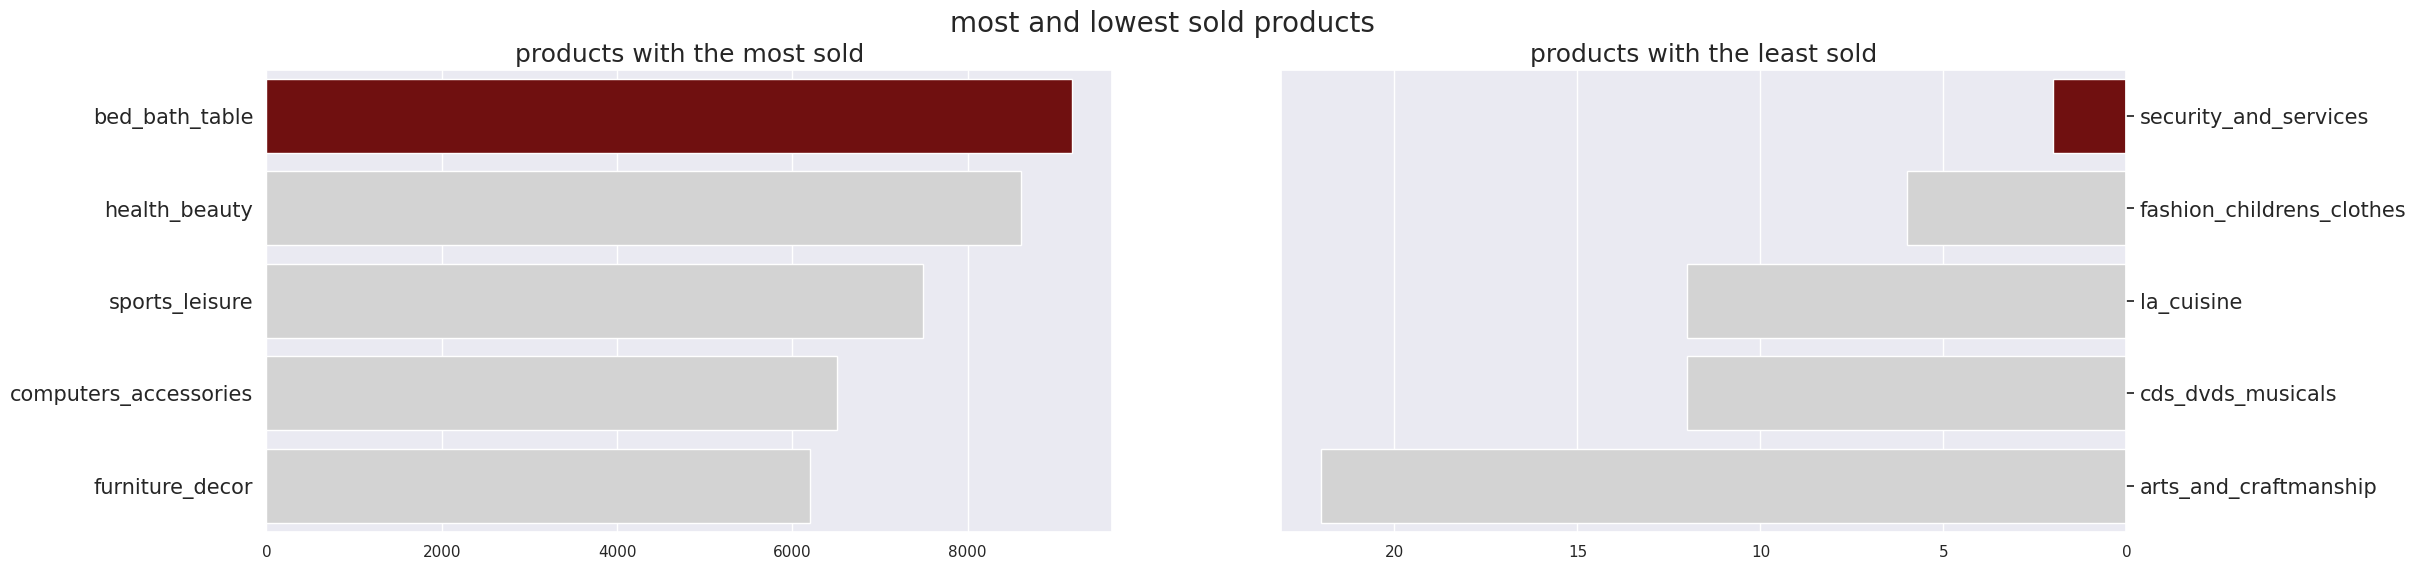

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["maroon", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="product_id", y="product_category_name_english", data=highest_product_sales.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("products with most sold", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="product_id", y="product_category_name_english", data=lowest_product_sales.head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("products with least sold", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("most and lowest sold products ",fontsize=20)
plt.show()

### Pertanyaan 2:

Pembeli darimana saja yang banyak melakukan order ?

In [ ]:
other_state_geolocation = data['geolocation'].groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')

other_state_geolocation[other_state_geolocation['count']>= 2].shape

max_state = data['geolocation'].groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates()

max_state

,geolocation_zip_code_prefix,geolocation_state,count
0,1001,SP,11
1,1002,SP,6
2,1003,SP,11
3,1004,SP,14
4,1005,SP,13
...,...,...,...
19018,99960,RS,5
19019,99965,RS,6
19020,99970,RS,16
19021,99980,RS,21


In [ ]:
median_geolocation = data['geolocation'].groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()
merged_geolocation_median = median_geolocation.merge(max_state,on=['geolocation_zip_code_prefix','geolocation_state'],how='inner')
merged_geolocation_median

,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng,count
0,1001,sao paulo,SP,-23.550161,-46.633998,11
1,1001,são paulo,SP,-23.549951,-46.634027,11
2,1002,sao paulo,SP,-23.548318,-46.635421,6
3,1002,são paulo,SP,-23.544641,-46.633180,6
4,1003,sao paulo,SP,-23.548976,-46.635318,11
...,...,...,...,...,...,...
27907,99965,agua santa,RS,-28.179542,-52.035551,6
27908,99970,ciriaco,RS,-28.343273,-51.875412,16
27909,99970,ciríaco,RS,-28.342325,-51.876023,16
27910,99980,david canabarro,RS,-28.388342,-51.846871,21


In [ ]:
customers_geolocation = customers_df.merge(merged_geolocation_median,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')
customers_geolocation = customers_geolocation.drop_duplicates("order_id")

In [85]:
# Specify the path where to save the CSV file
output_csv_path = "/content/data/geolocation_df"

# Save the all_data to a CSV file
customers_geolocation.to_csv(output_csv_path, index=False)

In [ ]:
#get most customer in locations
grouped_customer_geolocation = customers_geolocation.groupby('customer_state')['count'].count().reset_index()
most_customer_geolocation = grouped_customer_geolocation.sort_values(by='count', ascending=False)
most_customer_geolocation.head(5)

,customer_state,count
25,SP,40481
18,RJ,12337
10,MG,11345
22,RS,5340
17,PR,4912


In [ ]:
def plot_brazil_map(data):
    brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='maroon')
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -33.8,-33.75116944,5.4])
    plt.show()

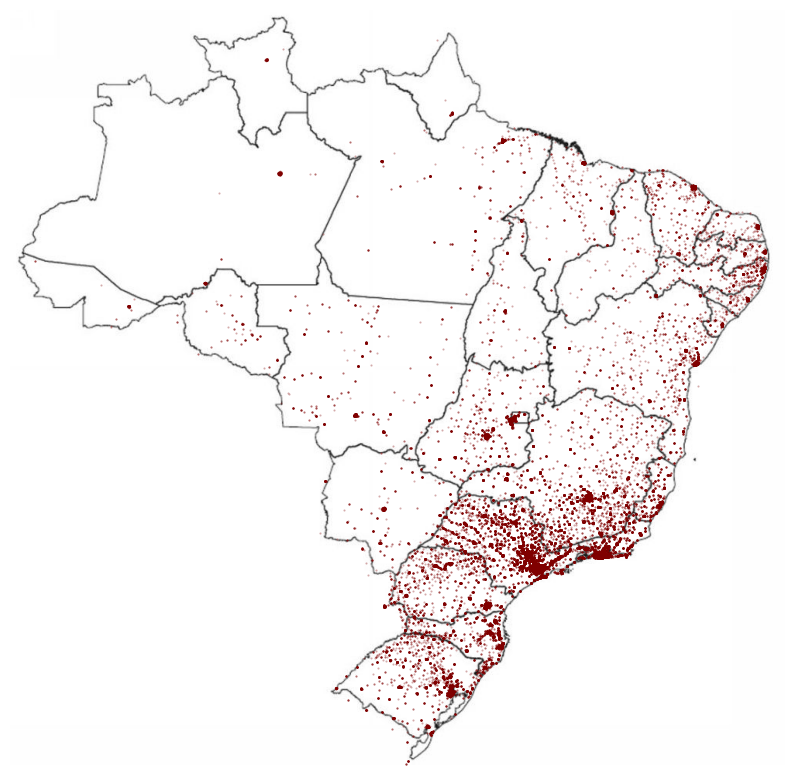

In [ ]:
plot_brazil_map(customers_geolocation.drop_duplicates(subset='customer_unique_id'))

### Pertanyaan 3:

Bagaimana tingkat kepuasan customer terhadap layanan

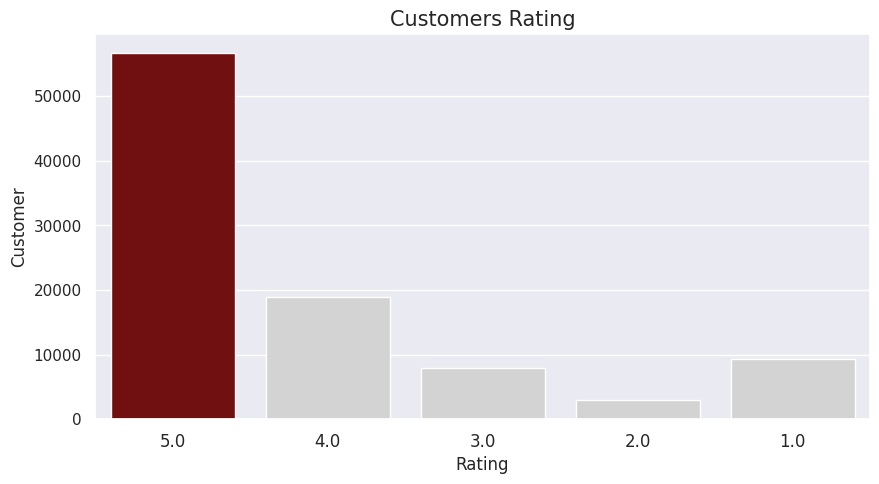

In [103]:
review_score_count = all_data_df['review_score'].value_counts().sort_values(ascending=False)
plot_data = review_score_count.sort_index(ascending=False)
max_score = review_score_count.idxmax()

sns.set(style="darkgrid")

plt.figure(figsize=(10, 5))
sns.barplot(x=plot_data.index,
            y=plot_data.values,
            order=plot_data.index,
            palette=["maroon" if score == max_score else "#D3D3D3" for score in plot_data.index]
            )

plt.title("Customers Rating", fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Customer")
plt.xticks(fontsize=12)
plt.show()

## *Conclusion*

- Kategori produk apa saja yang banyak dibeli ? <br>
Berdasarkan data yang sudah divisualisasikan, didapatkan bahwa kategori produk bed_bath_table merupakan kategori produk yang banyak dibeli dan kategori security_and_services merupakan produk yang jarang dibeli

- Pembeli darimana saja yang banyak melakukan order ? <br>
Berdasarkan grafik yang dibuat, pembeli dari negara bagian Sao Paulo (SP) , Rio de Janeiro (RJ), dan Minas Regais (MG) yang banyak melakukan order

- Bagaimana tingkat kepuasan customer terhadap layanan?
Berdasarkan data yang sudah divisualisasikan, didapatkan bahwa tingkat kepuasan customer terhadap layanan memuaskan, dengan rating terbanyak yang diberikan customer yaitu sempurna (5)